In [17]:
import gymnasium as gym
import numpy as np
import time
import seaborn
import matplotlib.pyplot as plt
import math
import random

![demo2](frozenlake_demo.gif)

In [18]:

# env = gym.make("FrozenLake-v1", render_mode="human")
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array")
obs = env.reset()
# print(env.P)

## Value iteration
V_1 = np.zeros(16)
policy_1 = np.zeros(16, dtype=int)
square_distance = []
Q = np.zeros((16, 4))
theta = 0.001

In [19]:
for _ in range(100):
    delta = 0
    for s in range(16):
        v = V_1[s]
        Q_values = []
        for a in range(4):
            # Calculate the Q-value for each action
            q = sum(p * (r + 0.9 * V_1[s_]) for p, s_, r, _ in env.unwrapped.P[s][a])
            Q[s][a] = q
            Q_values.append(q)
        # Update the value function for the current state
        V_1[s] = max(Q_values)
        policy_1[s] = np.argmax(Q_values)
        delta = max(delta, np.abs(v - V_1[s]))
    square_distance.append(delta**2)
    if delta < theta:
        print(_)
        break

22


Optimal Value Function:
[0.06428821 0.05807365 0.07231299 0.05356057 0.08830336 0.
 0.11127288 0.         0.14298808 0.24613328 0.29877497 0.
 0.         0.37905097 0.63860174 0.        ]


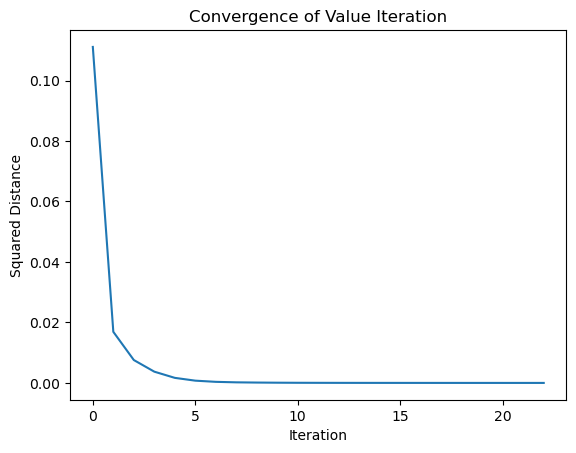

Optimal Policy:
[0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]
Q function:
[[0.06428821 0.06250109 0.06250109 0.05523548]
 [0.03650687 0.04085324 0.03878719 0.05807365]
 [0.07231299 0.06667955 0.07082423 0.05492221]
 [0.03762723 0.03762723 0.03186668 0.05356057]
 [0.08830336 0.0690169  0.06203021 0.0455596 ]
 [0.         0.         0.         0.        ]
 [0.11127288 0.08957899 0.11127288 0.0216939 ]
 [0.         0.         0.         0.        ]
 [0.06923476 0.11649707 0.10024433 0.14298808]
 [0.15655429 0.24613328 0.20323686 0.13247541]
 [0.29877497 0.2653931  0.22493498 0.10722185]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18749785 0.30521099 0.37905097 0.2653931 ]
 [0.3949009  0.63860174 0.61451894 0.53668111]
 [0.         0.         0.         0.        ]]


In [20]:

# Print the optimal value function
print("Optimal Value Function:")
print(V_1)
plt.plot(range(len(square_distance)), square_distance)
plt.xlabel("Iteration")
plt.ylabel("Squared Distance")
plt.title("Convergence of Value Iteration")
plt.show()

print("Optimal Policy:")
print(policy_1)

print("Q function:")
print(Q)

In [21]:
## Policy iteration

obs = env.reset()

policy_2 = np.random.choice(4, size=16) # Initialize the policy arbitrarily
V_2 = np.zeros(16) # Initialize the value function V(s) to zeros for all states
V_prev = np.zeros(16)
square_distance_2 = []
while True:
    # Policy Evaluation
    while True:
        delta = 0
        for s in range(16):
            v = V_2[s]
            a = policy_2[s]
            Q_value = sum(p * (r + 0.9 * V_2[s_]) for p, s_, r, _ in env.unwrapped.P[s][a])
            V_2[s] = Q_value
            delta = max(delta, np.abs(v - V_2[s]))
        if delta < theta:
            break

    # Policy Improvement
    policy_stable = True
    for s in range(16):
        old_action = policy_2[s]
        action_values = [sum(p * (r + 0.9 * V_2[s_]) for p, s_, r, _ in env.unwrapped.P[s][a]) for a in range(4)]
        policy_2[s] = np.argmax(action_values)  # Update policy to be greedy
        if old_action != policy_2[s]:
            policy_stable = False
    if policy_stable:
        break
    square_distance_2.append(np.sum((V_2 - V_prev) ** 2))
    V_prev = np.copy(V_2)


Optimal Policy:
[0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]
Optimal Value Function:
[0.06435818 0.05794066 0.0719679  0.0527825  0.0877399  0.
 0.11088337 0.         0.14197245 0.24511733 0.29812173 0.
 0.         0.37808931 0.63808165 0.        ]
[0.16108784726172815, 0.2457258512091853]


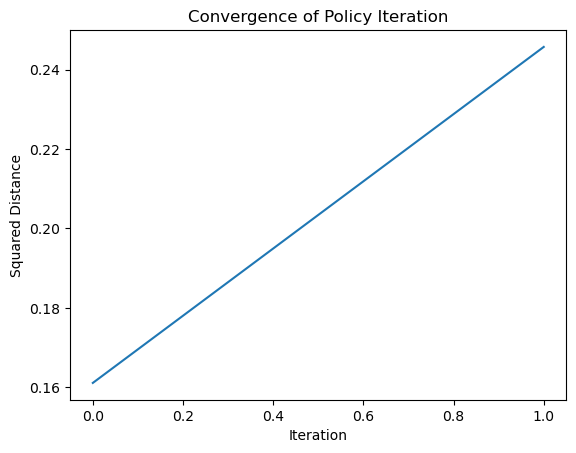

In [22]:
print("Optimal Policy:")
print(policy_2)

print("Optimal Value Function:")
print(V_2)

# Plot squared distances across iterations
print(square_distance_2)
plt.plot(range(len(square_distance_2)), square_distance_2)
plt.xlabel("Iteration")
plt.ylabel("Squared Distance")
plt.title("Convergence of Policy Iteration")
plt.show()


In [23]:

def Action_unif(s=0):
    return np.random.randint(0, 4)

def Action_optimal(s=0):
    if isinstance(s, int):
        s = s
    # else:
    #     s = int(np.where(s == 1)[0])
    if s in [4, 5, 6, 7, 10, 11, 12, 15]:  #left
        return 0
    elif s in [0,9, 14]:  # down
        return 1
    elif s in [1, 3, 8]:  # up
        return 3
    elif s in [2, 13]:  # right
        return 2

for i in range(10):
    env.reset()
    obs = 10
    for _ in range(30):
        obs, rewards, done, _c, _d = env.step(Action_optimal(obs))
        if done:
            env.render()
            # env.close()
            break


In [25]:
# %pip install imageio
import imageio

# Function to run a demo of the FrozenLake environment
def run_demo(env, policy, num_episodes=5, max_steps=100):
    for episode in range(num_episodes):
        obs, _ = env.reset()
        total_reward = 0
        for step in range(max_steps):
            env.render()
            action = policy[int(obs)]
            obs, reward, done, _, _ = env.step(action)
            total_reward += reward
            if done:
                break
        print(f"Episode {episode + 1}: Total Reward: {total_reward}")
        time.sleep(1)  # Add a delay between episodes for better visualization

# Run the demo using the optimal policy
# Run the demo using the optimal policy
run_demo(env, policy_1)

# Function to render the environment in RGB mode
# def render_rgb(env, policy, num_episodes=1, max_steps=100):
#     for episode in range(num_episodes):
#         obs, _ = env.reset()
#         frames = []
#         for step in range(max_steps):
#             frames.append(env.render())
#             action = policy[int(obs)]
#             obs, reward, done, _, _ = env.step(action)
#             if done:
#                 break
#         # Display the frames
#         for frame in frames:
#             plt.imshow(frame)
#             plt.axis('off')
#             plt.show()
#             time.sleep(0.1)  # Add a delay between frames for better visualization

# # Render the environment in RGB mode using the optimal policy
# render_rgb(env, policy_1)
def create_gif(frames, filename="frozenlake_demo.gif"):
    imageio.mimsave(filename, frames, duration=0.5)

# Collect frames for the demo
frames = []
obs, _ = env.reset()
for _ in range(100):
    frames.append(env.render())  # Ensure frames are collected
    action = policy_1[int(obs)]
    obs, reward, done, _, _ = env.step(action)
    if done:
        break
    frames.append(env.render())
    action = policy_1[int(obs)]
    obs, reward, done, _, _ = env.step(action)
    if done:
        obs, _ = env.reset()

# Create and save the gif
create_gif(frames)

Episode 1: Total Reward: 1.0
Episode 2: Total Reward: 0.0
Episode 3: Total Reward: 1.0
Episode 4: Total Reward: 1.0
Episode 5: Total Reward: 1.0
